In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# loading the dataset
train = pd.read_csv('../DATA/titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


##### A visualization of several missing entries

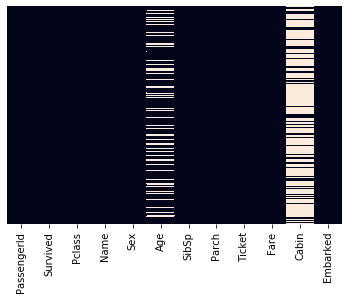

In [5]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

##### Counts of survival based on the gender

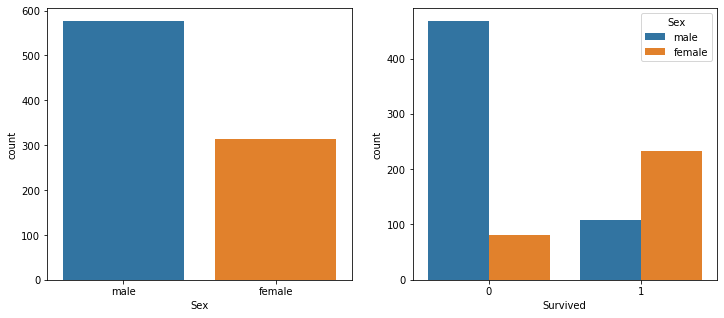

In [11]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.countplot(train['Sex'], ax=ax[0])
# sns.countplot(x='Survived', data=train)
sns.countplot(x='Survived', data=train, hue='Sex', ax=ax[1])

* Mostly the females are in the survival group.

In [12]:
nFemale = train[(train['Sex']=='female')].shape[0]
nFemaleSurvived = train[(train['Sex']=='female') & (train['Survived']==1)].shape[0]

nMale = train[(train['Sex']=='male')].shape[0]
nMaleSurvived = train[(train['Sex']=='male') & (train['Survived']==1)].shape[0]
print('Survived Females: {}/{} = {}%\nSurvived Males: {}/{} = {}%'.format(nFemaleSurvived, nFemale, round(100*nFemaleSurvived/nFemale, 3), 
                                                                          nMaleSurvived, nMale, round(100*nMaleSurvived/nMale, 3)))

Survived Females: 233/314 = 74.204%
Survived Males: 109/577 = 18.891%


##### Effect of class on the Surval prospect

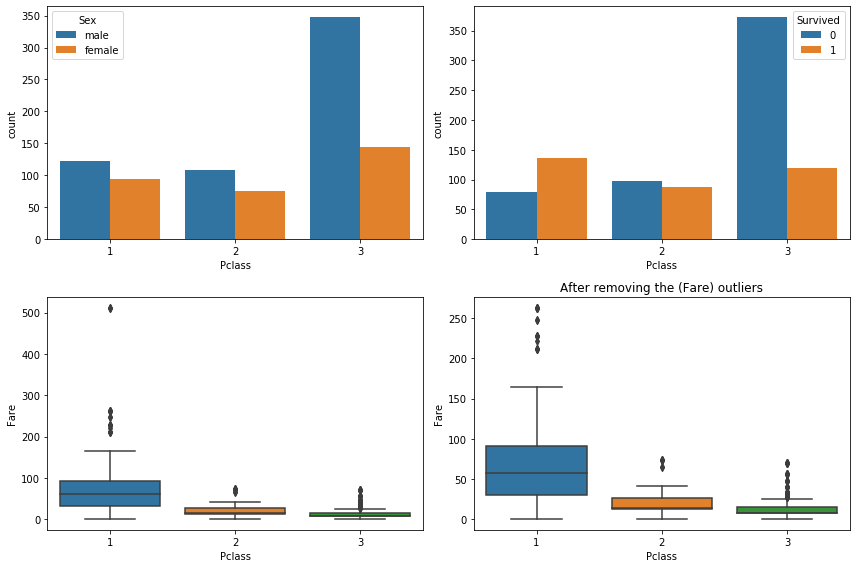

In [34]:
f, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
ax = ax.flatten()
sns.countplot(x='Pclass', data=train, hue='Sex', ax=ax[0])
sns.countplot(x='Pclass', data=train, hue='Survived', ax=ax[1])
sns.boxplot(data=train, x='Pclass', y='Fare', ax=ax[2])
sns.boxplot(data=train[train['Fare']<400], x='Pclass', y='Fare', ax=ax[3])
ax[3].set_title('After removing the (Fare) outliers');
plt.tight_layout()

Text(0.5, 1.0, 'After removing the (Fare) outlier')

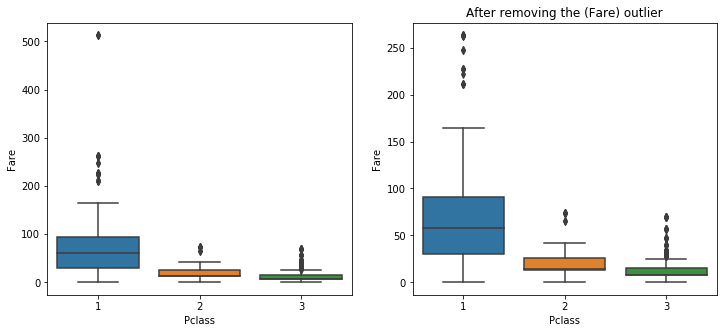

In [28]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
ax = ax.flatten()
sns.boxplot(data=train, x='Pclass', y='Fare', ax=ax[0])
sns.boxplot(data=train[train['Fare']<400], x='Pclass', y='Fare', ax=ax[1])
ax[1].set_title('After removing the (Fare) outlier')

* Clearly, the people who didnot survive were mostly from third class, that had the cheapest ticket price.

##### Frequency plot indicating boarding point (embark point) of passengers

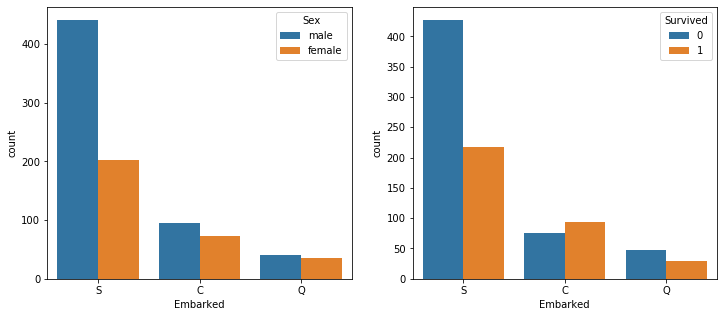

In [11]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
ax = ax.flatten()
sns.countplot(x='Embarked', data=train, hue='Sex', ax=ax[0])
sns.countplot(x='Embarked', data=train, hue='Survived', ax=ax[1])

##### Distribution of the Population

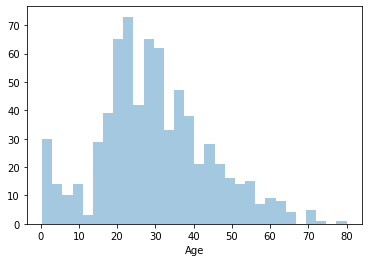

In [14]:
sns.distplot(train['Age'], bins=30, kde=False)

##### Relation between Age and travelling class of the passenger

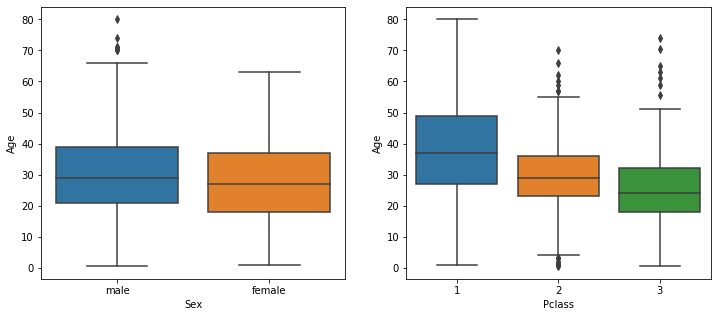

In [12]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
ax = ax.flatten()
sns.boxplot(x='Sex', y='Age', data=train, ax=ax[0])
sns.boxplot(x='Pclass', y='Age', data=train, ax=ax[1])

* Average age of people in the First class is higher than the other two. I make sense as it requires a fair amount of time in one's life to accumulate money.
* The feature Age has NAN entries and we deal with these entries with imputing them with the mean of 'Pclass' that the person belongs to. We prefer this procedure instead of simply imputing with mean of the eitire 'Age' column. 

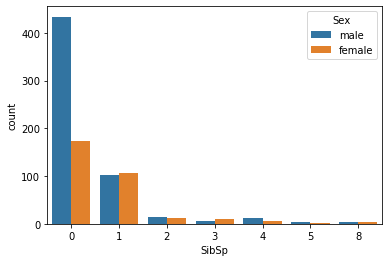

In [18]:
sns.countplot(x='SibSp', data=train, hue='Sex')

* Figure indicates that most people were travelling solo or were couples.

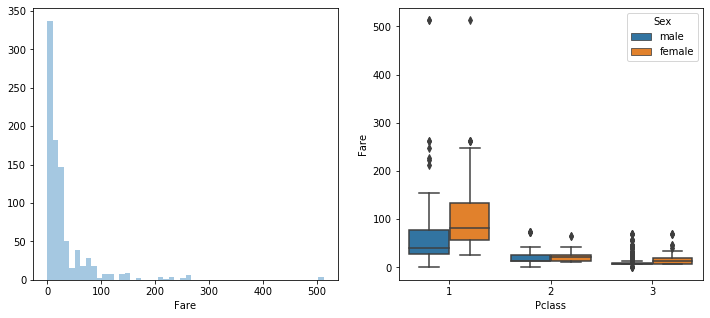

In [19]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
ax = ax.flatten()
sns.distplot(train['Fare'], ax=ax[0], kde=False)
sns.boxplot(x='Pclass', y='Fare', data=train, hue='Sex', ax=ax[1])

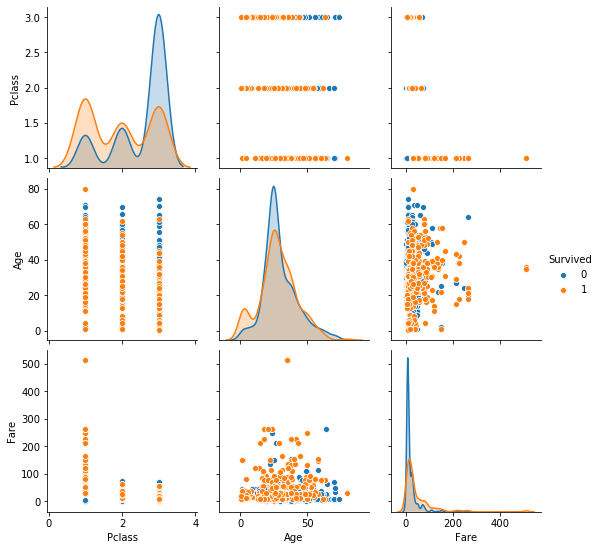

In [27]:
sns.pairplot(data=train[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']], hue='Survived')

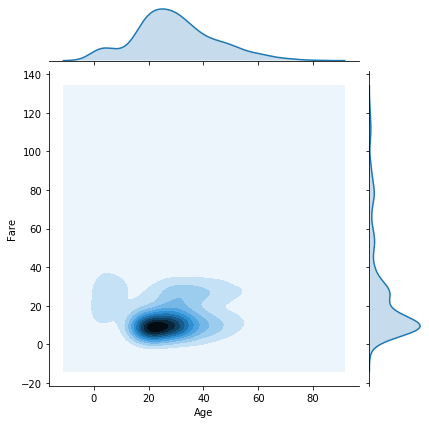

In [39]:
sns.jointplot(x='Age', y='Fare', data=train[train['Fare']<125], kind='kde')